# Неделия 1-2: анализ данных

`events` — датасет с событиями. Колонки:

* timestamp — время события
* visitorid — идентификатор пользователя
* event — тип события
* itemid — идентификатор объекта
* transactionid — идентификатор транзакции, если она проходила

`category_tree` — файл с деревом категорий (можно восстановить дерево).

* category_id — идентификатор категорий
* parent_id — идентификатор родительской категории

`item_properties` — файл с свойствами товаров.

* timestamp — момент записи значения свойства
* item_id — идентификатор объекта
* property — свойство, кажется, они все, кроме категории, захешированы
* value — значение свойства

In [90]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Задание 2.1
# Сколько записей событий находится в датасете? Ответ введите без пробелов и знаков препинания.

events = pd.read_csv('data/events.csv.zip')
display(events)
print(f"Total events: {events.shape[0]}")

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN
...,...,...,...,...,...
2756096,1438398785939,591435,view,261427,NaN
2756097,1438399813142,762376,view,115946,NaN
2756098,1438397820527,1251746,view,78144,NaN
2756099,1438398530703,1184451,view,283392,NaN


Total events: 2756101


In [3]:
# Задание 2.2
# Какие типы событий содержатся в датасете? Выберите все верные варианты.
# [X] view (просмотр карточки товара)
# [X] addtocart (добавление в корзину)
# [X] transaction (покупка)
# [ ] checkout (открытие карточки товара)
# [ ] review (оценка отзыва)

events['event'].value_counts()

event
view           2664312
addtocart        69332
transaction      22457
Name: count, dtype: int64

In [41]:
# Задание 2.3
# Сколько уникальных признаков товара есть в датасете? Ответ вводите без пробелов и знаков препинания.

prods1 = pd.read_csv('data/item_properties_part1.csv.zip')
prods2 = pd.read_csv('data/item_properties_part2.csv.zip')

item_properties = pd.concat([prods1, prods2], axis=0)
item_properties.sort_values(by='timestamp', inplace=True)
item_properties.reset_index(drop=True, inplace=True)
item_properties['timestamp'] = pd.to_datetime(item_properties['timestamp'], unit='ms')

categories = item_properties['property'].unique()
print(f'Unique categories: {len(categories)}')

display(item_properties)

Unique categories: 1104


,timestamp,itemid,property,value
0,2015-05-10 03:00:00,317951,790,n32880.000
1,2015-05-10 03:00:00,422842,480,1133979
2,2015-05-10 03:00:00,310185,776,103591
3,2015-05-10 03:00:00,110973,112,679677
4,2015-05-10 03:00:00,179597,available,0
...,...,...,...,...
20275897,2015-09-13 03:00:00,364708,928,769062
20275898,2015-09-13 03:00:00,231604,888,561561 1055803 447378 n12.000 1135780 1284577 ...
20275899,2015-09-13 03:00:00,161357,888,12762 16970 145048 237874 1229126 784581 12977...
20275900,2015-09-13 03:00:00,267142,available,0


In [7]:
# Задание 4.1
# Какой процент продаж обеспечивают топовые товары (точка отсечения — 1 июля)?
# Для расчёта используйте топ-3 товаров по числу транзакций.

# Преобразуем 'timestamp' в дату
events['timestamp'] = pd.to_datetime(events['timestamp'], unit='ms')

# Установим даты отсечения
cutoff_date = pd.Timestamp('2015-07-01')
cutoff_after = pd.Timestamp('2015-07-02')

# 1. Отфильтруем данные до 1 июля, оставив только транзакции
data_before_july = events[(events['timestamp'] < cutoff_date) & (events['event'] == 'transaction')]

# 2. Найдем топ-3 товара по количеству транзакций до 1 июля
top_items = data_before_july['itemid'].value_counts().nlargest(3).index

# 3. Отфильтруем данные после 1 июля, оставив только транзакции
data_after_july = events[(events['timestamp'] >= cutoff_after) & (events['event'] == 'transaction')]

# 4. Посчитаем общее количество транзакций после 1 июля
total_transactions_after_july = data_after_july.shape[0]

# 5. Посчитаем количество транзакций для топ-3 товаров после 1 июля
top_items_transactions_after_july = data_after_july[data_after_july['itemid'].isin(top_items)].shape[0]

# 6. Рассчитаем процент транзакций топ-3 товаров от общего числа транзакций после 1 июля
coverage_percentage = (top_items_transactions_after_july / total_transactions_after_july) * 100

print(f"Всего транзакция после июля: {total_transactions_after_july}")
print(f"Транзакции топ-3 товаров после июля: {top_items_transactions_after_july}")
print(f"Процент продаж, обеспечиваемых топ-3 товарами после 1 июля: {coverage_percentage:.2f}%")

Всего транзакция после июля: 12608
Транзакции топ-3 товаров после июля: 77
Процент продаж, обеспечиваемых топ-3 товарами после 1 июля: 0.61%


### Анализ лога событий

In [65]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   timestamp      datetime64[ns]
 1   visitorid      int64         
 2   event          object        
 3   itemid         int64         
 4   transactionid  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 105.1+ MB


In [67]:
# сделаем признак event категориальным

from pandas.api.types import CategoricalDtype

# Задание порядка категорий
event_order = CategoricalDtype(categories=['view', 'addtocart', 'transaction'], ordered=True)
events['event'] = events['event'].astype(event_order)

# Проверка категорий и их порядка
print(events['event'].cat.categories)

Index(['view', 'addtocart', 'transaction'], dtype='object')


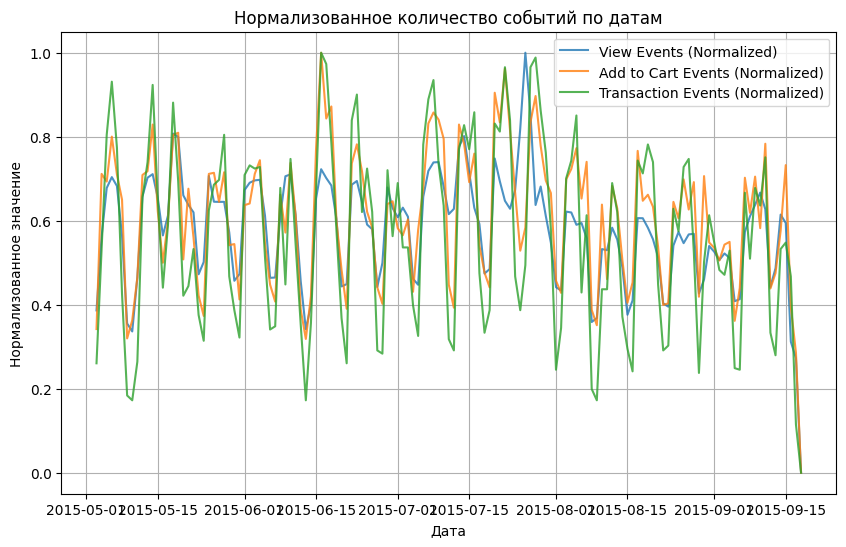

In [76]:
# посмотрим количество событий по типам

events['date'] = events['timestamp'].dt.date

view_events = events[events['event'] == 'view'].groupby('date')['event'].count()
addtocart_events = events[events['event'] == 'addtocart'].groupby('date')['event'].count()
transaction_events = events[events['event'] == 'transaction'].groupby('date')['event'].count()

view_events_normalized = (view_events - view_events.min()) / (view_events.max() - view_events.min())
addtocart_events_normalized = (addtocart_events - addtocart_events.min()) / (addtocart_events.max() - addtocart_events.min())
transaction_events_normalized = (transaction_events - transaction_events.min()) / (transaction_events.max() - transaction_events.min())

# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(view_events_normalized, label='View Events (Normalized)', alpha=0.8)
plt.plot(addtocart_events_normalized, label='Add to Cart Events (Normalized)', alpha=0.8)
plt.plot(transaction_events_normalized, label='Transaction Events (Normalized)', alpha=0.8)

# Добавляем легенду и заголовки
plt.title('Нормализованное количество событий по датам')
plt.xlabel('Дата')
plt.ylabel('Нормализованное значение')
plt.legend()
plt.grid(True)
plt.show()

#### Выводы
* Все три типа событий имеют схожие пики и спады, что может указывать на общую активность пользователей на платформе в определенные периоды.
* Больше всего событий `view` (что логично), но нормализация показывает, что они имеют наиболее стабильную динамику без значительных отклонений
* События `addtocart` и `transaction` имеют более резкие колебания, что может свидетельствовать о влиянии маркетинговых акций, скидок или других факторов, стимулирующих покупки.
* В некоторые дни все три линии достигают своих локальных максимумов, что может свидетельствовать об успешных маркетинговых инициативах (например, распродажах или акциях).
* В промежутках между пиками активность снижается, что говорит о типичных повседневных циклах активности пользователей.

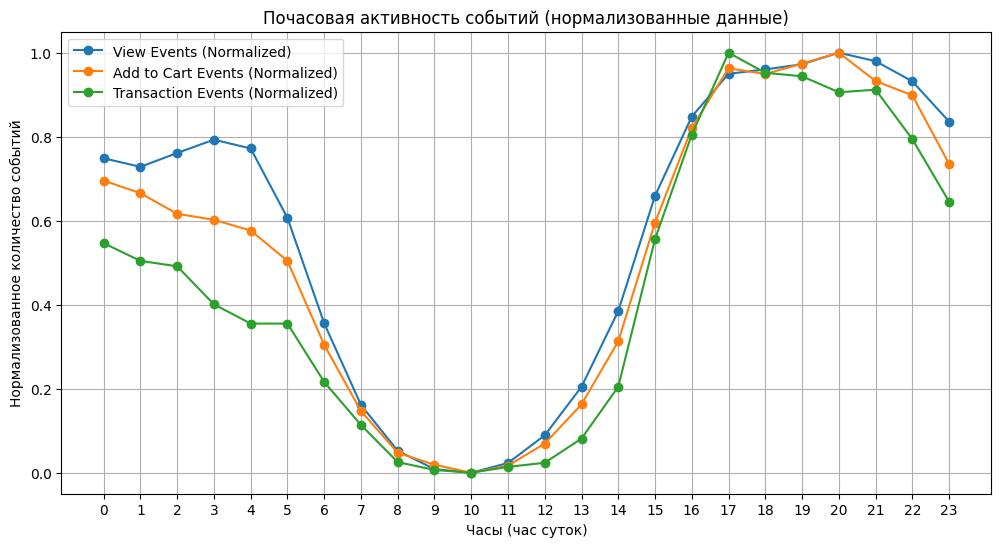

In [84]:
events['hour'] = events['timestamp'].dt.hour

view_events_by_hour = events[events['event'] == 'view'].groupby('hour')['event'].count()
addtocart_events_by_hour = events[events['event'] == 'addtocart'].groupby('hour')['event'].count()
transaction_events_by_hour = events[events['event'] == 'transaction'].groupby('hour')['event'].count()

view_events_normalized = (view_events_by_hour - view_events_by_hour.min()) / (view_events_by_hour.max() - view_events_by_hour.min())
addtocart_events_normalized = (addtocart_events_by_hour - addtocart_events_by_hour.min()) / (addtocart_events_by_hour.max() - addtocart_events_by_hour.min())
transaction_events_normalized = (transaction_events_by_hour - transaction_events_by_hour.min()) / (transaction_events_by_hour.max() - transaction_events_by_hour.min())

# Построение графиков
plt.figure(figsize=(12, 6))

# График для событий "view"
plt.plot(view_events_normalized.index, view_events_normalized, label='View Events (Normalized)', marker='o')

# График для событий "addtocart"
plt.plot(addtocart_events_normalized.index, addtocart_events_normalized, label='Add to Cart Events (Normalized)', marker='o')

# График для событий "transaction"
plt.plot(transaction_events_normalized.index, transaction_events_normalized, label='Transaction Events (Normalized)', marker='o')

# Настройки графика
plt.title('Почасовая активность событий (нормализованные данные)')
plt.xlabel('Часы (час суток)')
plt.ylabel('Нормализованное количество событий')
plt.xticks(range(0, 24))  # Указываем деления на оси X от 0 до 23
plt.grid(True)
plt.legend()
plt.show()


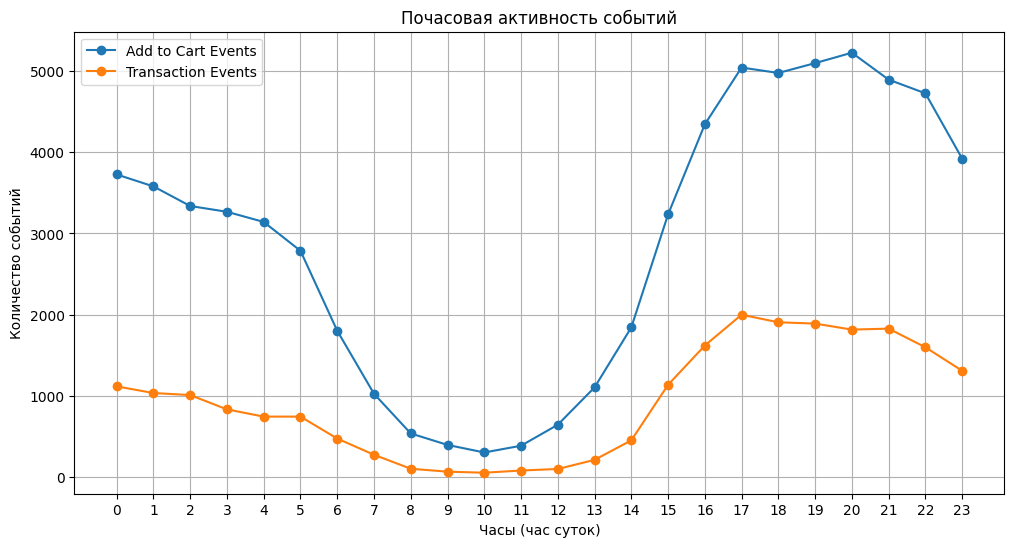

In [86]:
plt.figure(figsize=(12, 6))

# График для событий "addtocart"
plt.plot(addtocart_events_by_hour.index, addtocart_events_by_hour, label='Add to Cart Events', marker='o')

# График для событий "transaction"
plt.plot(transaction_events_by_hour.index, transaction_events_by_hour, label='Transaction Events', marker='o')

# Настройки графика
plt.title('Почасовая активность событий')
plt.xlabel('Часы (час суток)')
plt.ylabel('Количество событий')
plt.xticks(range(0, 24))  # Указываем деления на оси X от 0 до 23
plt.grid(True)
plt.legend()
plt.show()

#### Выводы
* Максимальная активность добавлений в корзину наблюдается в вечернее время (c 17 до 21), что может быть связано с окончанием рабочего дня, когда пользователи начинают совершать покупки.

* Транзакции также достигают своего пика в этот период, но в абсолютных значениях они значительно ниже, чем добавления в корзину.

* На протяжении всего дня заметно, что количество событий "Add to Cart" выше, чем "Transaction". Это говорит о том, что не все добавления в корзину приводят к завершению покупки.


### Анализ конверсии

Посмотрим на отношение количества событий на следующем шаге (например, `transaction`) к предыдущему (например, `view` или `addtocart`)

Конверсия view -> addtocart: 2.69%
Конверсия addtocart -> transaction: 31.07%


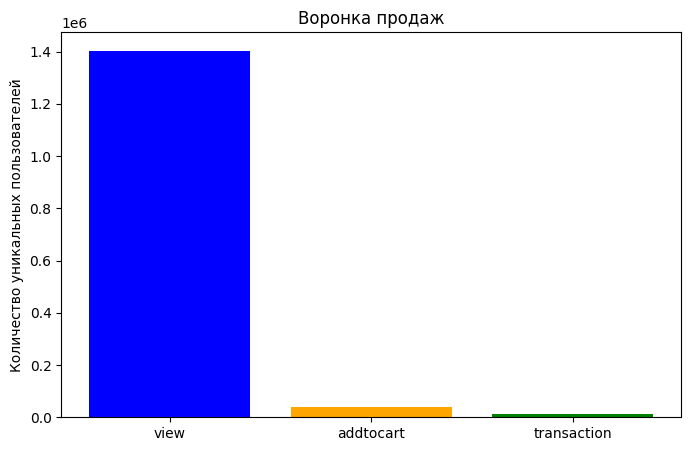

In [88]:
# Количество событий для каждого типа
total_views = events[events['event'] == 'view']['visitorid'].nunique()
total_addtocarts = events[events['event'] == 'addtocart']['visitorid'].nunique()
total_transactions = events[events['event'] == 'transaction']['visitorid'].nunique()

# Расчет конверсии
addtocart_conversion = total_addtocarts / total_views
transaction_conversion = total_transactions / total_addtocarts

print(f"Конверсия view -> addtocart: {addtocart_conversion:.2%}")
print(f"Конверсия addtocart -> transaction: {transaction_conversion:.2%}")

funnel = {
    "view": total_views,
    "addtocart": total_addtocarts,
    "transaction": total_transactions
}

plt.figure(figsize=(8, 5))
plt.bar(funnel.keys(), funnel.values(), color=['blue', 'orange', 'green'])
plt.title('Воронка продаж')
plt.ylabel('Количество уникальных пользователей')
plt.show()

#### Выводы
* Только 2.69% пользователей, которые просматривают товары, добавляют их в корзину, что является низкой конверсией.

* Более 31% пользователей, которые добавляют товары в корзину, завершают транзакцию, что указывает на то, что пользователи, дошедшие до этапа добавления в корзину, уже в значительной степени заинтересованы в покупке.

* Воронка показывает, что основная "утечка" пользователей происходит на этапе между `view` и `addtocart`. Это самая слабая часть воронки. Однако те пользователи, которые доходят до `addtocart`, демонстрируют хорошую готовность к завершению транзакции. Построение рекомендательной системы может улучшить этот этап.

event            view  addtocart  transaction
event                                        
view         1.000000   0.757616     0.782903
addtocart    0.757616   1.000000     0.903854
transaction  0.782903   0.903854     1.000000


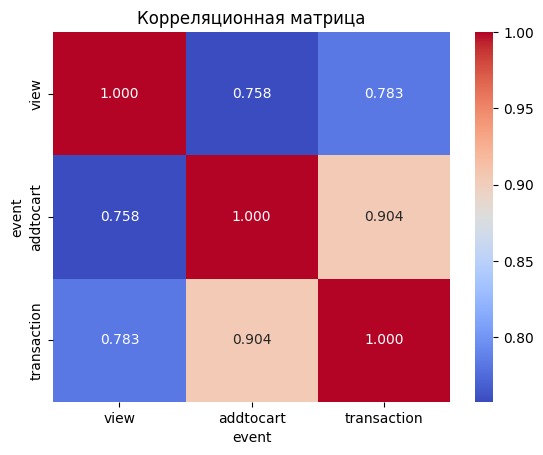

In [92]:
user_events = events.groupby(['visitorid', 'event']).size().unstack(fill_value=0)

# Корреляция между событиями
correlation_matrix = user_events.corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

#### Выводы
* Все значения корреляции находятся в диапазоне от 0.75 до 1.0, что указывает на сильную связь между событиями.

* Корреляция `view` с `addtocart` (0.757616)
    * Это говорит о том, что пользователи, которые просматривают товары, с высокой вероятностью добавляют их в корзину.
    * Однако корреляция чуть ниже 0.8 указывает на то, что не все просмотры приводят к добавлению в корзину, что согласуется с низкой конверсией "view -> addtocart" (2.69%).

* Корреляция между `addtocart` и `transaction` (0.903854)
    * Это самая высокая корреляция среди всех пар событий, что указывает на очень сильную связь.
    * Пользователи, которые добавляют товар в корзину, с большой вероятностью завершают покупку. Это согласуется с высокой конверсией "addtocart -> transaction" (31.07%), что подчеркивает, что основной этап для принятия решения — это добавление товара в корзину.

* Матрица корреляции подтверждает, что этапы воронки связаны между собой, особенно `addtocart` и `transaction`. Основной фокус стоит направить на улучшение конверсии "view -> addtocart", так как этот этап вносит наибольший вклад в снижение общей конверсии.

Посмотрим сколько времени проходит между "view", "addtocart" и "transaction" для каждого пользователя.

In [93]:
events_sorted = events.sort_values(by=['visitorid', 'timestamp'])

# Вычисление времени между событиями
events_sorted['time_to_next'] = events_sorted.groupby('visitorid')['timestamp'].diff()

# Анализ временных интервалов для разных событий
time_to_addtocart = events_sorted[events_sorted['event'] == 'addtocart']['time_to_next']
time_to_transaction = events_sorted[events_sorted['event'] == 'transaction']['time_to_next']

print(f"Среднее время до добавления в корзину: {time_to_addtocart.mean()}")
print(f"Среднее время до транзакции: {time_to_transaction.mean()}")


Среднее время до добавления в корзину: 0 days 05:05:12.004512092
Среднее время до транзакции: 0 days 00:30:39.059964725


#### Выводы
* Среднее время до добавления в корзину - 5 часов 5 минут

* Среднее время до транзакции - 30 минут

* Короткое время на этапе "addtocart -> transaction" подтверждает, что заинтересованные пользователи быстро завершают покупку. Основной фокус стоит направить на оптимизацию первого этапа воронки.

#### Проверим различаются ли частоты событий между категориями

Используем тест хи-квадрат
* Нулевая гипотеза ($H_0$): Распределение событий одинаково и не зависит от других факторов (например, времени суток)
* Альтернативная гипотеза ($H_1$): Распределение событий различается в зависимости от факторов (например, времени суток)

In [99]:
from scipy.stats import chi2_contingency

# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p, alpha=0.05):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# Создаем таблицу частот событий по часам
hourly_events = events.groupby(['hour', 'event']).size().unstack(fill_value=0)

chi2, p, dof, expected = chi2_contingency(hourly_events)

# Результаты
print(f"Хи-квадрат: {chi2}")
print(f"Степени свободы: {dof}")

decision_hypothesis(p)

Хи-квадрат: 2204.491972262143
Степени свободы: 46
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


Проверим различие в распределении событий по дням недели

* Нулевая гипотеза ($H_0$): Распределение событий одинаково и не зависит от других факторов (например, дня недели)
* Альтернативная гипотеза ($H_1$): Распределение событий различается в зависимости от факторов (например, для недели)

In [100]:
events['day_of_week'] = events['timestamp'].dt.day_name()

# Группируем по дню недели и типу события
daily_events = events.groupby(['day_of_week', 'event']).size().unstack(fill_value=0)

# Применяем хи-квадрат тест
chi2, p, dof, expected = chi2_contingency(daily_events)

# Результаты
print(f"Хи-квадрат: {chi2}")
print(f"Степени свободы: {dof}")

decision_hypothesis(p)

Хи-квадрат: 828.2996439862753
Степени свободы: 12
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


#### Выводы
* хи-тест подтвердил визульные данные о зависимости событий от времени суток и дня недели

#### Проверим  есть ли значимые различия в продажах между категориями

Поскольку мы сравниваем продажи в трех или более категориях, то будем использовать ANOVA (анализ дисперсии) тест.

In [105]:
# Объединяем таблицы событий и категорий
transactions = events[events['event'] == 'transaction']
transactions = transactions.merge(item_properties[item_properties['property'] == 'categoryid'][['itemid', 'value']],
                                  left_on='itemid', right_on='itemid', how='left')

# Переименовываем колонку 'value' для удобства
transactions.rename(columns={'value': 'category'}, inplace=True)

# Считаем продажи по категориям
sales_by_category = transactions.groupby('category')['transactionid'].count()
print(sales_by_category)

category
0       12
1       80
1001     6
1002    26
1003     5
        ..
988     14
992      8
997     13
998      4
999     14
Name: transactionid, Length: 751, dtype: int64


In [122]:
# Для корректного применения ANOVA важно проверить, соответствуют ли данные нормальному распределению.

from scipy.stats import shapiro

# Пример: проверка для одной категории
category_sales = transactions[transactions['category'] == '1509']['transactionid']
stat, p = shapiro(category_sales)
print(f"P-значение для проверки нормальности: {p}")

if p > 0.05:
    print("Данные соответствуют нормальному распределению")
else:
    print("Данные не соответствуют нормальному распределению")

P-значение для проверки нормальности: 1.2426834332081593e-23
Данные не соответствуют нормальному распределению


Поскольку данные не соотвествую нормальному распределению ANOVA-тест может дать некорретные результаты.
Поэтому используем непараметрические тесты, которые не требуют нормального распределения.

In [125]:
# применим тест Крускала-Уоллиса (для 3 и более категорий): Это непараметрический аналог ANOVA,
# который сравнивает распределения между несколькими группами.

# Установка минимального порога наблюдений в категории
min_observations = 5

# Фильтруем категории
filtered_categories = [category for category in categories
                       if transactions[transactions['category'] == category].shape[0] >= min_observations]

# Пересобираем данные
sales_data = [transactions[transactions['category'] == category]['transactionid'] for category in filtered_categories]

# Применяем тест Крускала-Уоллиса
from scipy.stats import kruskal
stat, p_value = kruskal(*sales_data)
print(f"Критерий Крускала-Уоллиса: {stat}")
print(f"P-значение: {p_value}")

if p_value < 0.05:
    print("Существуют значимые различия между категориями")
else:
    print("Нет значимых различий между категориями")

Критерий Крускала-Уоллиса: 2035.868402738579
P-значение: 1.6686770440918626e-163
Существуют значимые различия между категориями


#### Выводы
*  Существуют статистически значимые различия в продажах между категориями.


## Генерация факторов, связанных с айтемами

In [154]:
category_tree = pd.read_csv("data/category_tree.csv.zip")

In [158]:

def build_category_levels(category_tree):
    """
    Построение уровней категорий из дерева категорий.
    """
    category_tree["level"] = 0
    while True:
        parent_levels = category_tree.set_index("categoryid")["level"].to_dict()
        updated = category_tree["parentid"].map(parent_levels).fillna(0) + 1
        if (updated == category_tree["level"]).all():
            break
        category_tree["level"] = updated
    return category_tree


def preprocess_item_properties(item_properties):
    """
    Агрегация свойств товаров: количество уникальных свойств и последнее обновление.
    """
    item_properties_agg = (
        item_properties.groupby("itemid")
        .agg(
            unique_properties_count=("property", "nunique"),
            last_property_update=("timestamp", "max")
        )
        .reset_index()
    )
    return item_properties_agg


# Построение уровней категорий из category_tree
category_tree = build_category_levels(category_tree)

# Извлечение категорий товаров из item_properties.
# Предполагаем, что свойство "categoryid" связано с категориями
item_categories = (
    item_properties[item_properties["property"] == "categoryid"]
    .groupby("itemid")
    .agg(item_category_id=("value", "first"))  # Если у айтема несколько категорий, берем первую
    .reset_index()
)

# Преобразуем столбец item_category_id в int для связи с category_tree
item_categories["item_category_id"] = item_categories["item_category_id"].astype(int)

# Агрегация событий по itemid из events
item_features = (
    events.groupby("itemid")
    .agg(
        total_item_interactions=("event", "count"),
        total_item_view_count=("event", lambda x: (x == "view").sum()),
        total_item_add_to_cart_count=("event", lambda x: (x == "add_to_cart").sum()),
        total_item_purchase_count=("event", lambda x: (x == "purchase").sum()),
        unique_visitors=("visitorid", "nunique")
    )
    .reset_index()
)

# Добавление коэффициентов конверсии
item_features["item_purchase_rate"] = (
    item_features["total_item_purchase_count"] / item_features["total_item_view_count"]
).fillna(0)

item_features["item_add_to_cart_rate"] = (
    item_features["total_item_add_to_cart_count"] / item_features["total_item_view_count"]
).fillna(0)

# Присоединение категорий из item_properties
item_features = item_features.merge(item_categories, on="itemid", how="left")

# Присоединение уровней категорий из category_tree
item_features = item_features.merge(
    category_tree.rename(columns={"categoryid": "item_category_id", "level": "category_level"}),
    how="left",
    on="item_category_id"
)

# Агрегация свойств товаров из item_properties
item_properties_agg = preprocess_item_properties(item_properties)

# Присоединяем свойства к item_features
item_features = item_features.merge(item_properties_agg, on="itemid", how="left")

# Сохранение итоговой таблицы
item_features.to_csv("data/item_features.csv", index=False)

print("Генерация item_features завершена. Результат сохранен в 'data/item_features.csv'.")


Генерация item_features завершена. Результат сохранен в 'data/item_features.csv'.


In [159]:
item_features

,itemid,total_item_interactions,total_item_view_count,total_item_add_to_cart_count,total_item_purchase_count,unique_visitors,item_purchase_rate,item_add_to_cart_rate,item_category_id,parentid,category_level,unique_properties_count,last_property_update
0,3,2,2,0,0,2,0.0,0.0,1171.0,938.0,4.0,29.0,2015-09-13 03:00:00
1,4,3,3,0,0,3,0.0,0.0,1038.0,1174.0,4.0,25.0,2015-09-13 03:00:00
2,6,29,29,0,0,26,0.0,0.0,1091.0,573.0,5.0,27.0,2015-09-13 03:00:00
3,9,2,2,0,0,2,0.0,0.0,NaN,NaN,NaN,NaN,NaT
4,15,22,18,0,0,13,0.0,0.0,722.0,1110.0,3.0,21.0,2015-09-13 03:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235056,466861,95,89,0,0,76,0.0,0.0,1051.0,955.0,4.0,28.0,2015-09-13 03:00:00
235057,466862,4,4,0,0,4,0.0,0.0,1376.0,480.0,4.0,31.0,2015-08-16 03:00:00
235058,466863,1,1,0,0,1,0.0,0.0,173.0,788.0,3.0,23.0,2015-07-12 03:00:00
235059,466864,91,89,0,0,58,0.0,0.0,373.0,340.0,5.0,28.0,2015-09-13 03:00:00


## Генерация айтем-юзер факторов

In [161]:
# Агрегация событий по парам user-item
user_item_features = (
    events.groupby(["visitorid", "itemid"])
    .agg(
        user_item_interactions=("event", "count"),
        user_item_view_count=("event", lambda x: (x == "view").sum()),
        user_item_add_to_cart_count=("event", lambda x: (x == "add_to_cart").sum()),
        user_item_purchase_count=("event", lambda x: (x == "purchase").sum()),
        last_interaction=("timestamp", "max")
    )
    .reset_index()
)

# Рассчитываем "давность" последнего взаимодействия
current_time = events["timestamp"].max()
user_item_features["recency"] = (current_time - user_item_features["last_interaction"]).dt.total_seconds()

# Агрегация пользовательских факторов
user_features = (
    events.groupby("visitorid")
    .agg(
        total_user_interactions=("event", "count"),
        total_user_view_count=("event", lambda x: (x == "view").sum()),
        total_user_add_to_cart_count=("event", lambda x: (x == "add_to_cart").sum()),
        total_user_purchase_count=("event", lambda x: (x == "purchase").sum())
    )
    .reset_index()
)

# Присоединяем пользовательские метрики к user-item
user_item_features = user_item_features.merge(user_features, on="visitorid", how="left")

# Доля взаимодействий пользователя с айтемом
user_item_features["user_item_interaction_share"] = (
    user_item_features["user_item_interactions"] / user_item_features["total_user_interactions"]
).fillna(0)

# Присоединяем айтемные метрики из item_features
user_item_features = user_item_features.merge(
    item_features[["itemid", "total_item_interactions"]],
    on="itemid",
    how="left"
)

# Доля взаимодействий айтема с пользователем
user_item_features["item_user_interaction_share"] = (
    user_item_features["user_item_interactions"] / user_item_features["total_item_interactions"]
).fillna(0)

# Сохранение итоговой таблицы
user_item_features.to_csv("data/user_item_features.csv", index=False)

print("Генерация user_item_features завершена. Результат сохранен в 'data/user_item_features.csv'.")


Генерация user_item_features завершена. Результат сохранен в 'data/user_item_features.csv'.


In [162]:
user_item_features

,visitorid,itemid,user_item_interactions,user_item_view_count,user_item_add_to_cart_count,user_item_purchase_count,last_interaction,recency,total_user_interactions,total_user_view_count,total_user_add_to_cart_count,total_user_purchase_count,user_item_interaction_share,total_item_interactions,item_user_interaction_share
0,0,67045,1,1,0,0,2015-09-11 20:55:17.175,5.402706e+05,3,3,0,0,0.333333,205,0.004878
1,0,285930,1,1,0,0,2015-09-11 20:49:49.439,5.405983e+05,3,3,0,0,0.333333,95,0.010526
2,0,357564,1,1,0,0,2015-09-11 20:52:39.591,5.404282e+05,3,3,0,0,0.333333,271,0.003690
3,1,72028,1,1,0,0,2015-08-13 17:46:06.444,3.057221e+06,1,1,0,0,1.000000,52,0.019231
4,2,216305,2,2,0,0,2015-08-07 18:17:43.170,3.573725e+06,8,8,0,0,0.250000,588,0.003401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145174,1407575,121220,1,1,0,0,2015-06-10 21:46:08.922,8.572419e+06,1,1,0,0,1.000000,17,0.058824
2145175,1407576,356208,1,1,0,0,2015-06-03 15:01:29.991,9.201498e+06,1,1,0,0,1.000000,24,0.041667
2145176,1407577,427784,1,1,0,0,2015-05-17 21:48:04.867,1.064590e+07,1,1,0,0,1.000000,29,0.034483
2145177,1407578,188736,1,1,0,0,2015-05-17 01:21:23.288,1.071950e+07,1,1,0,0,1.000000,78,0.012821


In [167]:
events

,timestamp,visitorid,event,itemid,transactionid,date,hour,day_of_week
0,2015-06-02 05:02:12.117,257597,view,355908,NaN,2015-06-02,5,Tuesday
1,2015-06-02 05:50:14.164,992329,view,248676,NaN,2015-06-02,5,Tuesday
2,2015-06-02 05:13:19.827,111016,view,318965,NaN,2015-06-02,5,Tuesday
3,2015-06-02 05:12:35.914,483717,view,253185,NaN,2015-06-02,5,Tuesday
4,2015-06-02 05:02:17.106,951259,view,367447,NaN,2015-06-02,5,Tuesday
...,...,...,...,...,...,...,...,...
2756096,2015-08-01 03:13:05.939,591435,view,261427,NaN,2015-08-01,3,Saturday
2756097,2015-08-01 03:30:13.142,762376,view,115946,NaN,2015-08-01,3,Saturday
2756098,2015-08-01 02:57:00.527,1251746,view,78144,NaN,2015-08-01,2,Saturday
2756099,2015-08-01 03:08:50.703,1184451,view,283392,NaN,2015-08-01,3,Saturday


Сделаем разбиения на тренировочную и тестовую выборки с учетом временной последовательности (out-of-time split) 

In [172]:
# Сортируем данные по времени
events = events.sort_values(by='timestamp')

# Найдем пороговую дату для разделения (80% данных для обучения)
split_date = events['timestamp'].quantile(0.8)
print(f"Дата разделения: {split_date}")

# Разделяем данные на тренировочную и тестовую выборки
train_set = events[events['timestamp'] <= split_date]
test_set = events[events['timestamp'] > split_date]

print(f"Размер тренировочной выборки: {len(train_set)} записей")
print(f"Размер тестовой выборки: {len(test_set)} записей")

# Сохраняем выборки в отдельные файлы
train_set.to_csv("data/events_train.csv", index=False)
test_set.to_csv("data/events_test.csv", index=False)
print("Сохранение тестовой и тренировочной выборок завершено.")

Дата разделения: 2015-08-18 04:23:31.966000128
Размер тренировочной выборки: 2204881 записей
Размер тестовой выборки: 551220 записей
Сохранение тестовой и тренировочной выборок завершено.
